## PREDICATES

In [2]:
using GeoStats
import CairoMakie as Mke
using PairPlots
using GeoStats.DataScienceTraits: Continuous

In [3]:
Paths = "D:\\MAIN\\MODELS\\SPATIAL\\geospatial-data-science-with-julia\\"

"D:\\MAIN\\MODELS\\SPATIAL\\geospatial-data-science-with-julia\\"

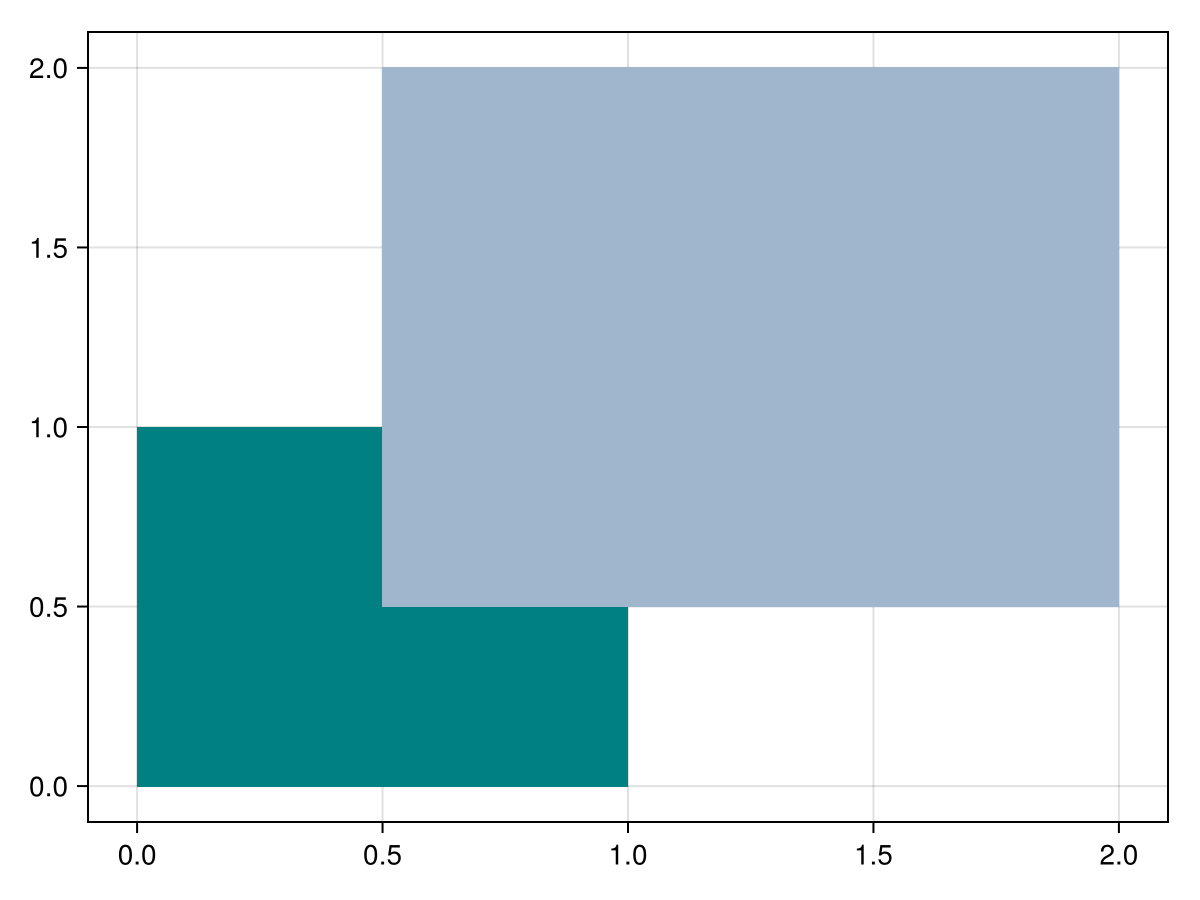

In [4]:
b1 = Box((0, 0), (1, 1))
b2 = Box((0.5, 0.5), (2, 2))

viz([b1, b2], color = ["teal", "slategray3"])

In [5]:
# Is b1 in bw
b1 ⊆ b2

false

In [6]:
outer = [(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)]
hole1 = [(0.2, 0.2), (0.4, 0.2), (0.4, 0.4), (0.2, 0.4)]
hole2 = [(0.6, 0.2), (0.8, 0.2), (0.8, 0.4), (0.6, 0.4)]

poly  = PolyArea([outer, hole1, hole2])

ball1 = Ball((0.5, 0.5), 0.05)
ball2 = Ball((0.3, 0.3), 0.05)

viz([poly, ball1, ball2], color = ["slategray3", "teal", "brown"])

intersects(poly, ball1)

true

In [7]:
s1 = Segment((0.0, 0.0), (1.0, 0.0))
s2 = Segment((0.5, 0.0), (2.0, 0.0))

s1 ∩ s2

Segment{2,Float64}
├─ Point(0.5, 0.0)
└─ Point(1.0, 0.0)

In [8]:
intersection(s1, s2) do I
	if I == GeoStats.Crossing
	  return 1
	else
	  return 0
	end
 end

0

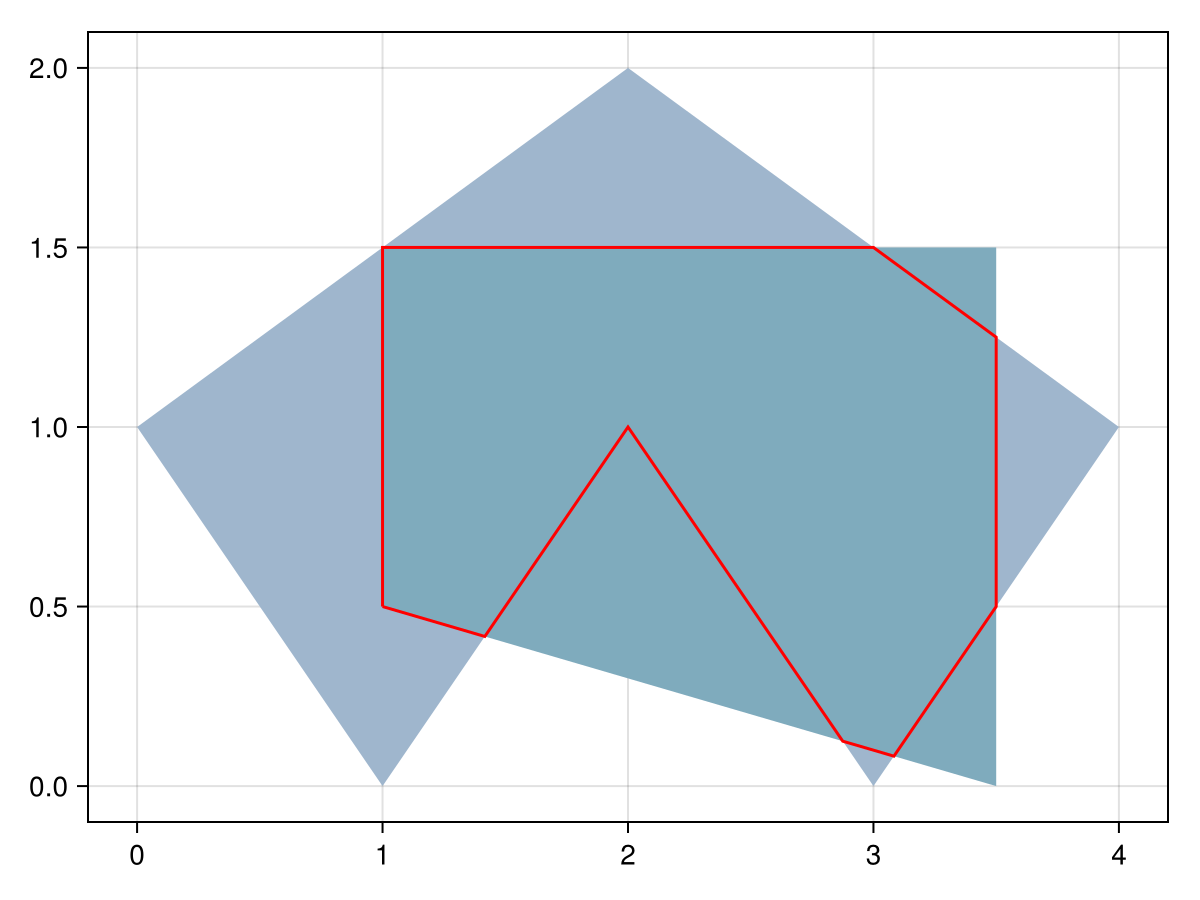

In [9]:
# Intersessions
poly1 = Ngon((0, 1), (1, 0), (2, 1), (3, 0), (4, 1), (2, 2))
poly2 = Ngon((1.0, 0.5), (3.5, 0.0), (3.5, 1.5), (1.0, 1.5))

poly  = poly1 ∩ poly2

viz([poly1, poly2])
viz!(poly2, color = "teal", alpha = 0.2)
viz!(boundary(poly), color = "red")
Mke.current_figure()

In [10]:
GeoStats.area(poly), GeoStats.perimeter(poly), GeoStats.vertices(poly)

(2.447916666666667, 7.598044863023599, Point2[Point(1.0, 0.5), Point(1.4166666666666667, 0.4166666666666667), Point(2.0, 1.0), Point(2.875, 0.125), Point(3.0833333333333335, 0.08333333333333333), Point(3.5, 0.4999999999999999), Point(3.5, 1.25), Point(3.0, 1.5), Point(1.0, 1.5)])

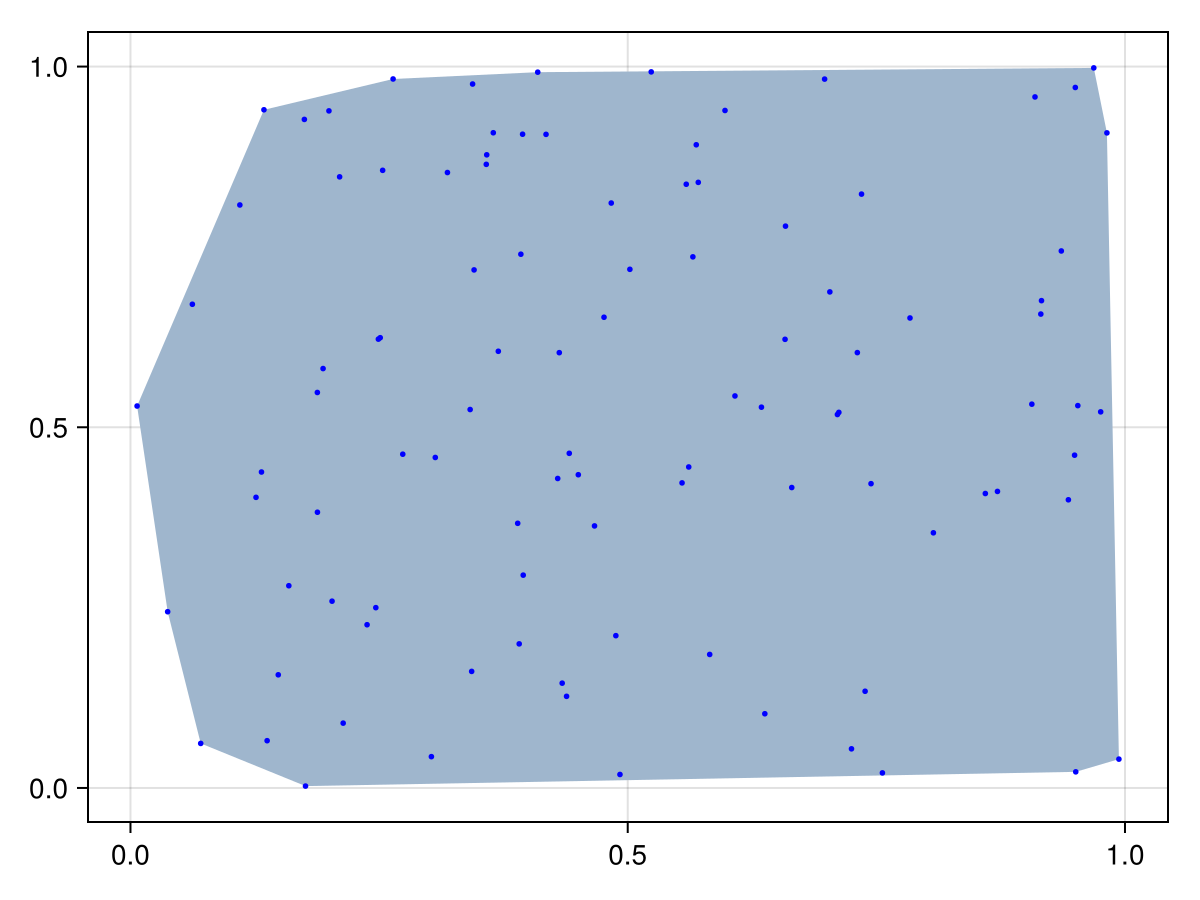

In [11]:
points = rand(GeoStats.Point2, 100)
viz(convexhull(points))
viz!(points, color = :blue)
Mke.current_figure()

In [12]:
# What are the different type of mesh
subtypes(Mesh)


5-element Vector{Any}:
 CartesianGrid
 RectilinearGrid
 SimpleMesh
 StructuredGrid
 TransformedMesh

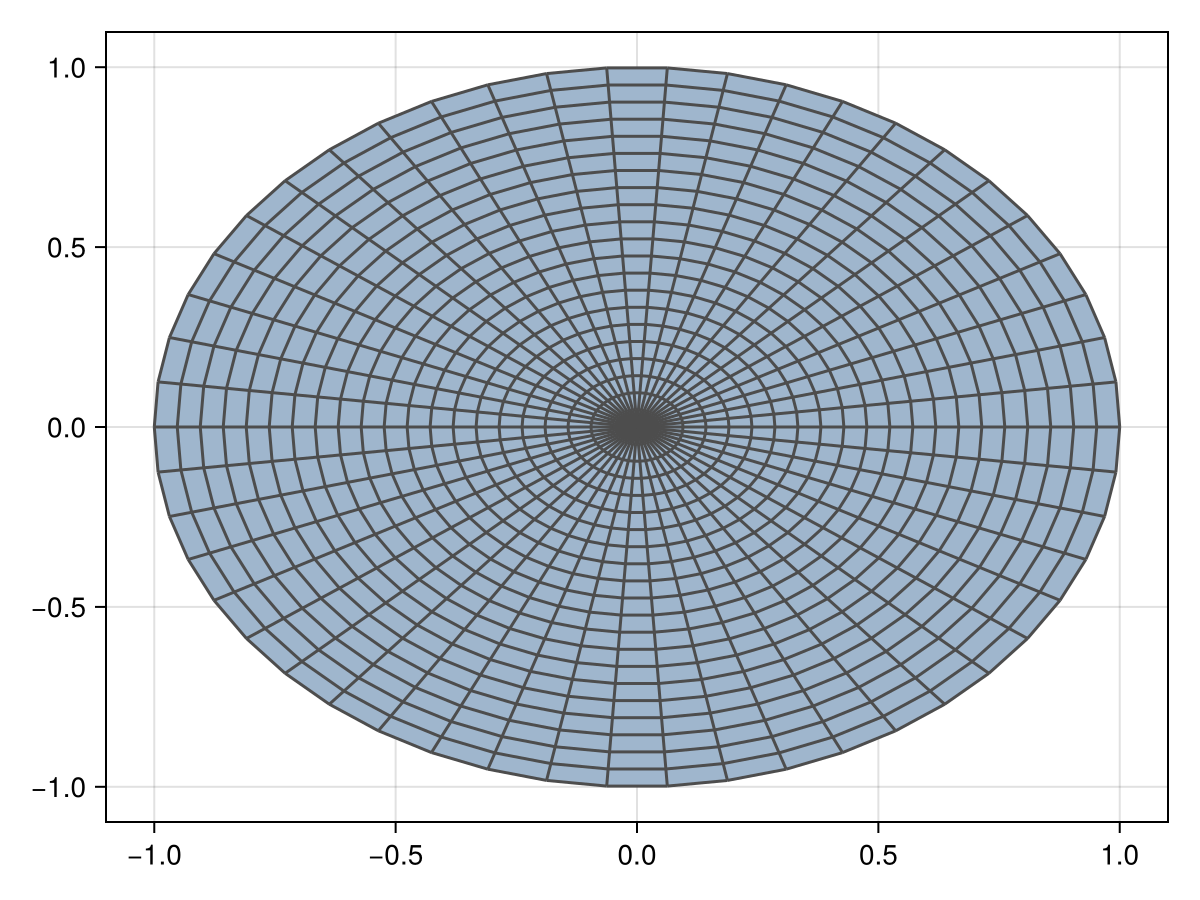

In [13]:
ball = Ball((0, 0), 1)

mesh = discretize(ball, RegularDiscretization(20, 50))
viz(mesh, showsegments = true)

## TRANSFORMS

In [14]:
N = 10000
a = [2randn(N÷2) .+ 6; randn(N÷2)]
b = [3randn(N÷2); 2randn(N÷2)]
c = randn(N)
d = c .+ 0.6randn(N)

table = (; a, b, c, d)

gt = georef(table, CartesianGrid(100, 100))

a,b,c,d,geometry
Continuous,Continuous,Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],[NoUnits],[NoUnits],
11.4453,1.27268,-1.62295,-1.9986,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
9.02409,-0.983957,0.00449536,0.488688,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
7.94703,1.07743,-1.32803,-2.55296,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
7.69604,0.634518,0.268382,-0.368197,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
5.43651,1.1422,1.01757,1.17997,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
2.66342,1.62553,-1.22722,-2.00152,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
6.70886,-1.03958,0.506494,1.11041,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
6.49389,-0.358996,0.289986,0.0341267,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [15]:
N = 10000
a = 2randn(N÷2) .+ 6
b = 3randn(N÷2)
c = randn(N)
d = c .+ 0.6randn(N)

table = (; a, b, c, d)

@show table

gt = GeoStats.georef((a=a, b=b), CartesianGrid(100, 100))

Excessive output truncated after 608092 bytes.

table = 

a,b,geometry
Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],
4.60982,-1.6854,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
5.70296,-4.47558,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
3.10405,1.23355,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
7.59693,2.87378,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
5.17476,4.01479,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
9.14836,0.0223665,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
3.22413,-5.8531,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
5.86807,-0.807848,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


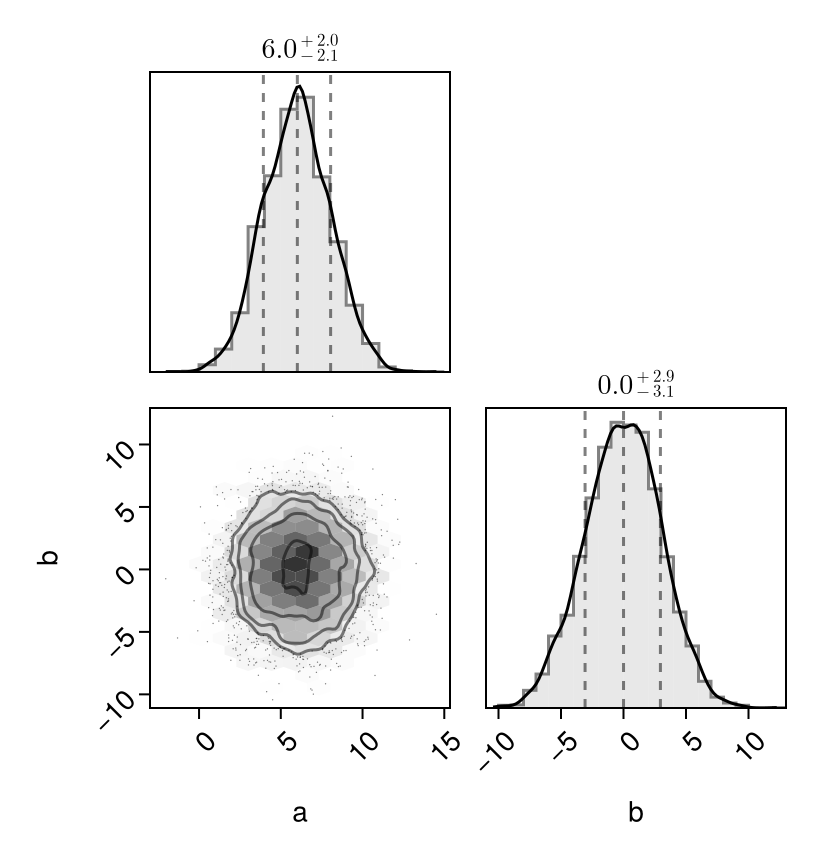

In [16]:
Mke.hist(gt.a, color = "gray80")
GeoStats.cor(gt.a, gt.b)

PairPlots.pairplot(values(gt))

In [17]:
""" Unlike direct column access, the Select and Reject transforms preserve geospatial information."""

gt |> GeoStats.Select("a", "b")
gt |>GeoStats.Select(r"[ab]") # columns matching regular expression
gt |> GeoStats.Select("a" => "A", "b" => "B")


A,B,geometry
Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],
4.60982,-1.6854,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
5.70296,-4.47558,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
3.10405,1.23355,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
7.59693,2.87378,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
5.17476,4.01479,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
9.14836,0.0223665,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
3.22413,-5.8531,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
5.86807,-0.807848,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [18]:
gt


a,b,geometry
Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],
4.60982,-1.6854,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
5.70296,-4.47558,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
3.10405,1.23355,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
7.59693,2.87378,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
5.17476,4.01479,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
9.14836,0.0223665,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
3.22413,-5.8531,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
5.86807,-0.807848,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [19]:
rt = gt |> ColTable()


a,b,geometry
Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],
4.60982,-1.6854,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
5.70296,-4.47558,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
3.10405,1.23355,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
7.59693,2.87378,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
5.17476,4.01479,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
9.14836,0.0223665,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
3.22413,-5.8531,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
5.86807,-0.807848,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [20]:
gt |> Sort("a", "b")

a,b,geometry
Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],
-2.03703,-0.747645,"Quadrangle((45.0, 19.0), ..., (45.0, 20.0))"
-1.31397,-5.48619,"Quadrangle((98.0, 47.0), ..., (98.0, 48.0))"
-0.304296,-2.50818,"Quadrangle((97.0, 40.0), ..., (97.0, 41.0))"
-0.177896,0.130811,"Quadrangle((96.0, 47.0), ..., (96.0, 48.0))"
-0.0779533,-4.91374,"Quadrangle((49.0, 31.0), ..., (49.0, 32.0))"
0.0864911,5.00633,"Quadrangle((80.0, 46.0), ..., (80.0, 47.0))"
0.236415,0.725125,"Quadrangle((94.0, 12.0), ..., (94.0, 13.0))"
0.339925,3.72384,"Quadrangle((65.0, 9.0), ..., (65.0, 10.0))"


In [21]:
rt = georef((a=[1,-999,3], b=[NaN,5,6]))
rt |> Replace(-999 => 1, NaN => 2)


a,b,geometry
Categorical,Continuous,Segment
[NoUnits],[NoUnits],
1,2,"Segment((0.0,), (1.0,))"
1,5.0,"Segment((1.0,), (2.0,))"
3,6.0,"Segment((2.0,), (3.0,))"


In [22]:
ct = georef((a=[1,missing,3], b=[4,5,6]))|> DropMissing()

a,b,geometry
Categorical,Categorical,Segment
[NoUnits],[NoUnits],
1,4,"Segment((0.0,), (1.0,))"
3,6,"Segment((2.0,), (3.0,))"


# STATISTICAL

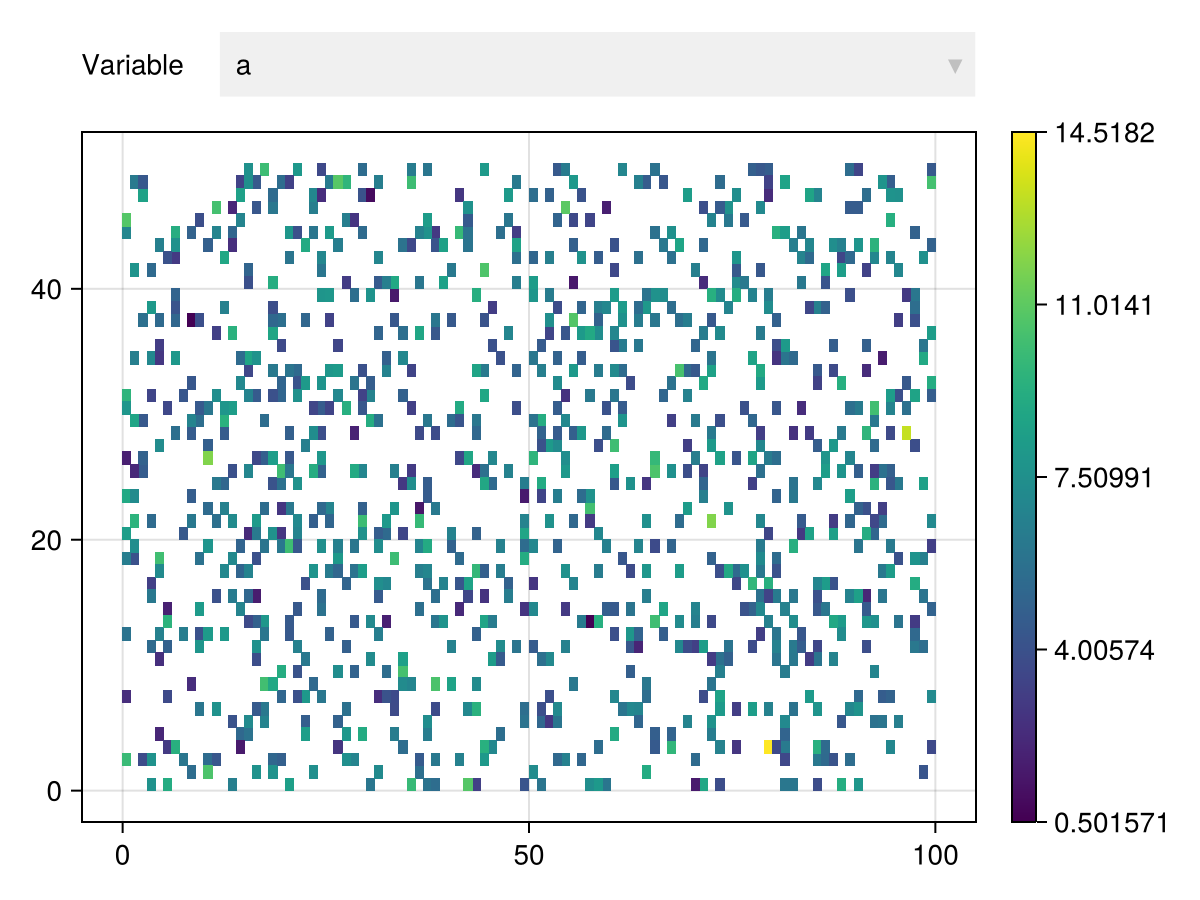

In [23]:
gt |> Sample(1000, replace=false) |> viewer

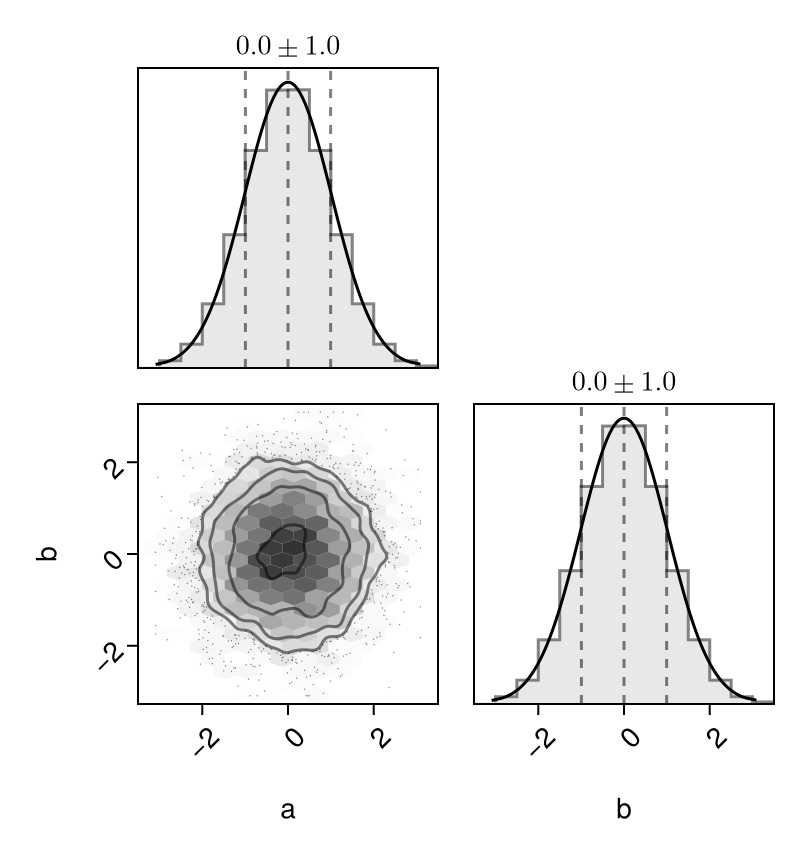

In [24]:
gt |>  Quantile() |> values |> pairplot



In [25]:

st = georef((a=[1,2,2,2,3,3], b=[1,2,3,4,5,6])) |> Coerce("b" => Continuous)
eltype(st.b)

Float64

In [26]:
st = georef((a=[1,2,2,2,3,3], b=[1,2,3,4,5,6]))
eltype(st.b)

Int64

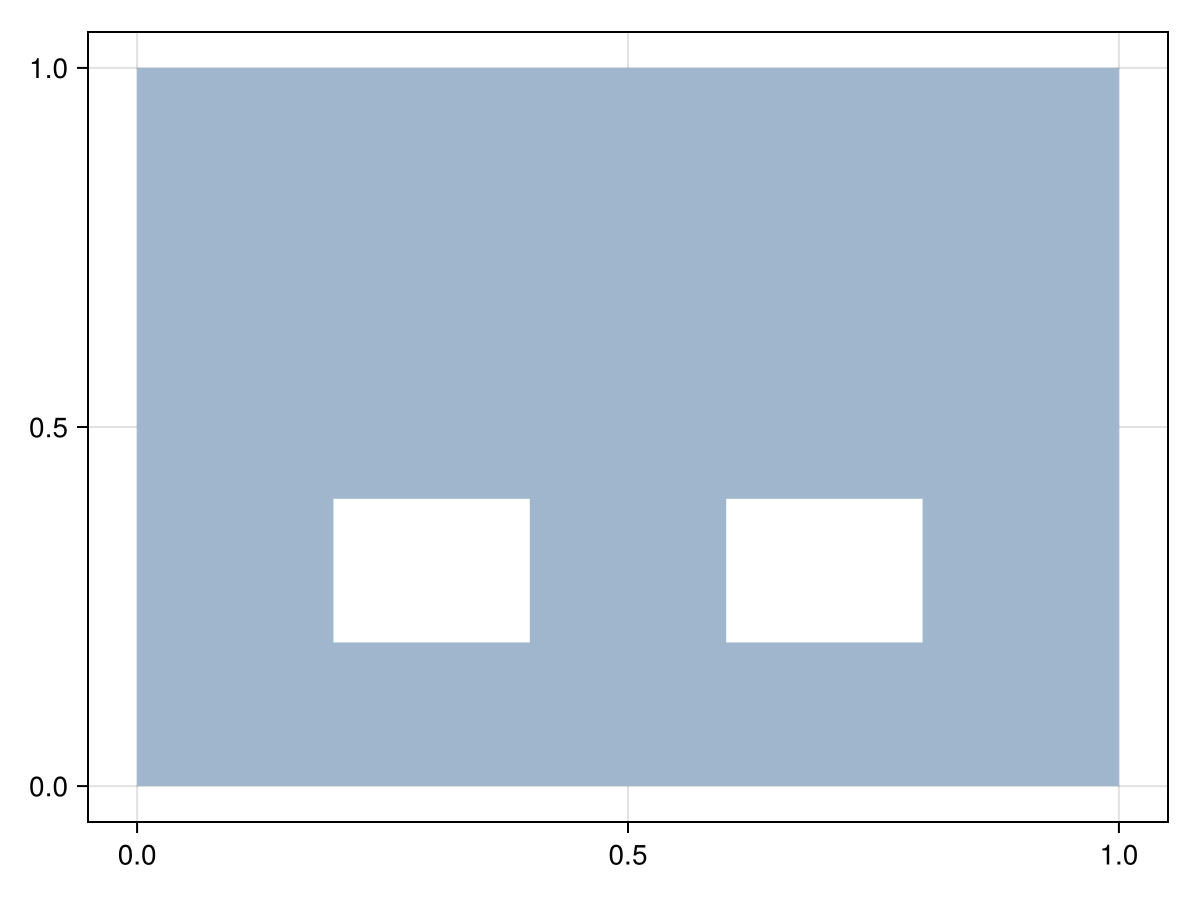

In [27]:
outer = [(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)]
hole1 = [(0.2, 0.2), (0.4, 0.2), (0.4, 0.4), (0.2, 0.4)]
hole2 = [(0.6, 0.2), (0.8, 0.2), (0.8, 0.4), (0.6, 0.4)]
poly  = PolyArea([outer, hole1, hole2])

viz(poly)

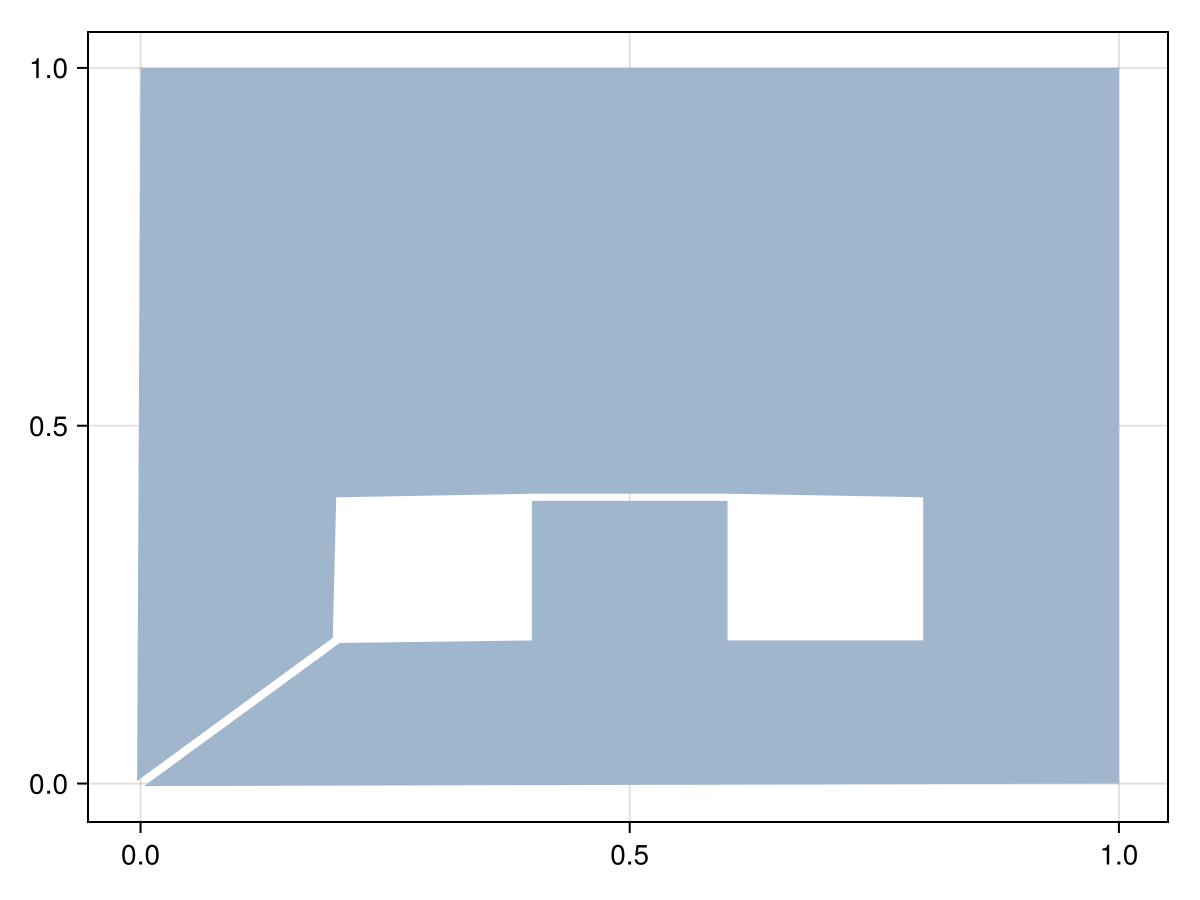

In [28]:
poly |> Bridge(0.01) |> viz


# Geospatial transforms

One of the major advantages of transforms compared to traditional row/column access in data science is that they **preserve geospatial information**. There is no need to keep track of indices in arrays to repeatedly reattach values to geometries.

In [29]:
A = [1, 2, 3, 4, 5]
B = [1.1, 2.2, 3.3, 4.4, 5.5]
p1 = PolyArea((2, 0), (6, 2), (2, 2))
p2 = PolyArea((0, 6), (3, 8), (0, 10))
p3 = PolyArea((3, 6), (9, 6), (9, 9), (6, 9))
p4 = PolyArea((7, 0), (10, 0), (10, 4), (7, 4))
p5 = PolyArea((1, 3), (5, 3), (6, 6), (3, 8), (0, 6))
gt = georef((; A, B), [p1, p2, p3, p4, p5])

gt |> view

MethodError: MethodError: no method matching view(::GeoTable{@NamedTuple{A::Vector{Int64}, B::Vector{Float64}}})

Closest candidates are:
  view(::AbstractGeoTable, !Matched::AbstractVector{Int64})
   @ GeoTables C:\Users\PollaccoJ\.julia\packages\GeoTables\w3GSN\src\abstractgeotable.jl:81
  view(::AbstractGeoTable, !Matched::Geometry)
   @ GeoTables C:\Users\PollaccoJ\.julia\packages\GeoTables\w3GSN\src\abstractgeotable.jl:83
  view(::Any, !Matched::AbstractDict)
   @ Indexing C:\Users\PollaccoJ\.julia\packages\Indexing\iF84V\src\view.jl:181
  ...


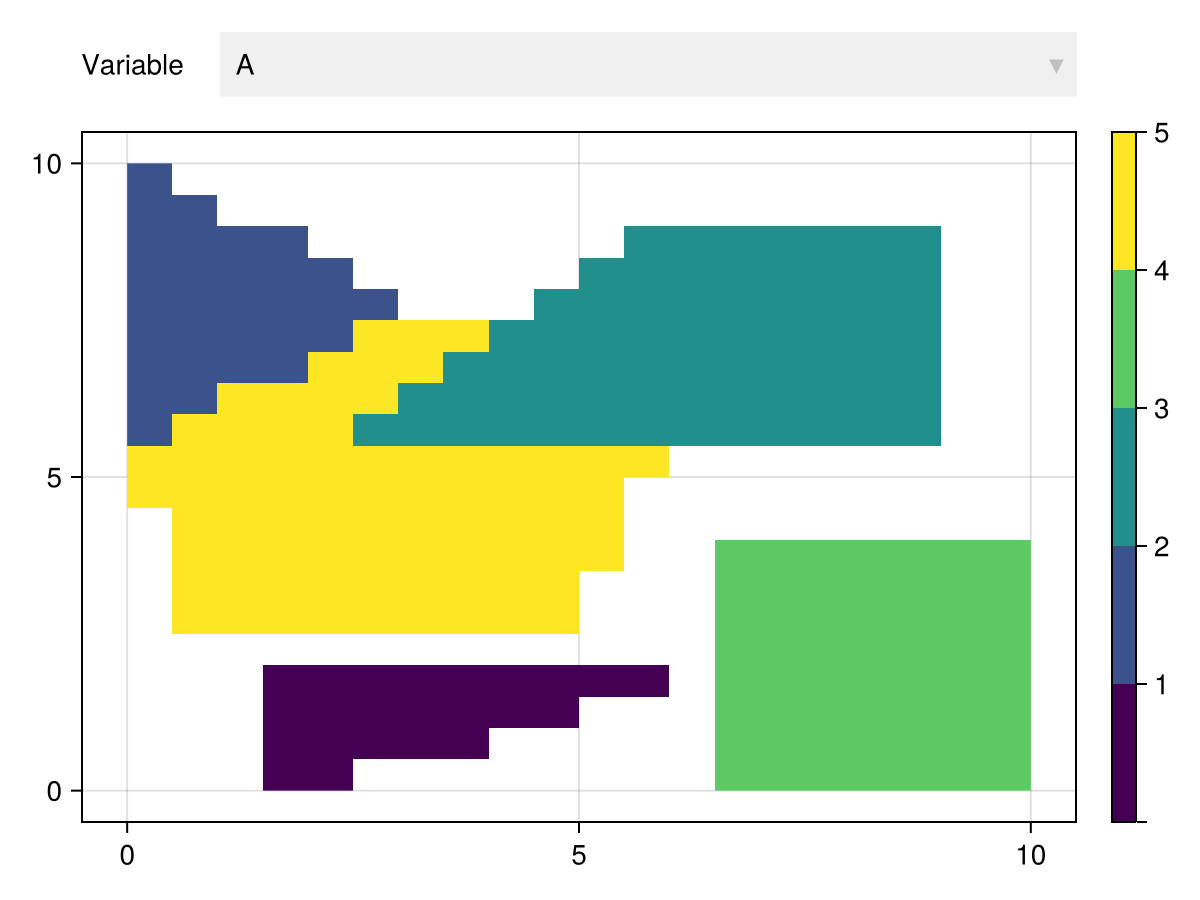

In [30]:
nt = gt |> Rasterize(20, 20) |> viewer

# # Building pipelines

In [31]:
N = 10000
a = [2randn(N÷2) .+ 6; randn(N÷2)]
b = [3randn(N÷2); 2randn(N÷2)]
c = randn(N)
d = c .+ 0.6randn(N)

table = (; a, b, c, d)

gt = georef(table, CartesianGrid(100, 100))

a,b,c,d,geometry
Continuous,Continuous,Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],[NoUnits],[NoUnits],
7.97555,-0.626932,1.97774,1.75209,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
8.70955,1.37155,0.606789,-0.070413,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
6.39552,-0.174388,-0.650792,-1.15689,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
7.02433,1.08517,-0.377828,0.389877,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
5.52636,-0.0335428,0.615398,-0.475315,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
3.27948,-1.32887,0.286651,0.474144,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
3.14846,-1.57268,-0.148427,0.0654666,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
8.99493,-1.81739,-0.598076,0.877997,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [32]:
pipeline = Select("a", "b", "c") → Quantile()
gt |> pipeline


a,b,c,geometry
Continuous,Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],[NoUnits],
1.40038,-0.260342,2.00093,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
1.70604,0.553969,0.58641,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
0.796744,-0.0714998,-0.646431,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
1.00686,0.434673,-0.378041,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
0.526127,-0.0120321,0.597161,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
0.106734,-0.554554,0.265272,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
0.0941374,-0.64674,-0.154266,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
1.83167,-0.748763,-0.591478,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [33]:
using CSV

gt = georef(CSV.File(Paths *"data/bonnie.csv"), (:EAST, :NORTH, :RL))

Auppm,Agppm,Cuppm,Asppm,Sper,CODE,OX,ISBD,geometry
Continuous,Continuous,Continuous,Continuous,Continuous,Categorical,Categorical,Continuous,Point3
[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],
0.407,2.335,1311.0,27.0,0.01,C1,TR1,2.42,"(243940.0, 1.00223e6, 1855.0)"
0.407,2.335,1311.0,27.0,0.01,C1,TR1,1.98,"(243945.0, 1.00223e6, 1855.0)"
0.407,2.335,1311.0,27.0,0.01,C1,TR1,2.068,"(243950.0, 1.00226e6, 1855.0)"
0.385,2.1,572.0,0.0,0.0,C1,TR1,2.222,"(243965.0, 1.00226e6, 1855.0)"
0.385,2.1,572.0,0.0,0.0,C1,TR1,2.156,"(243970.0, 1.00226e6, 1855.0)"
0.385,2.1,572.0,0.0,0.0,C1,OX1,2.08,"(243960.0, 1.00227e6, 1855.0)"
0.385,2.1,572.0,0.0,0.0,C1,OX1,2.06,"(243965.0, 1.00227e6, 1855.0)"
0.385,2.1,572.0,0.0,0.0,C1,OX1,1.9,"(243970.0, 1.00227e6, 1855.0)"


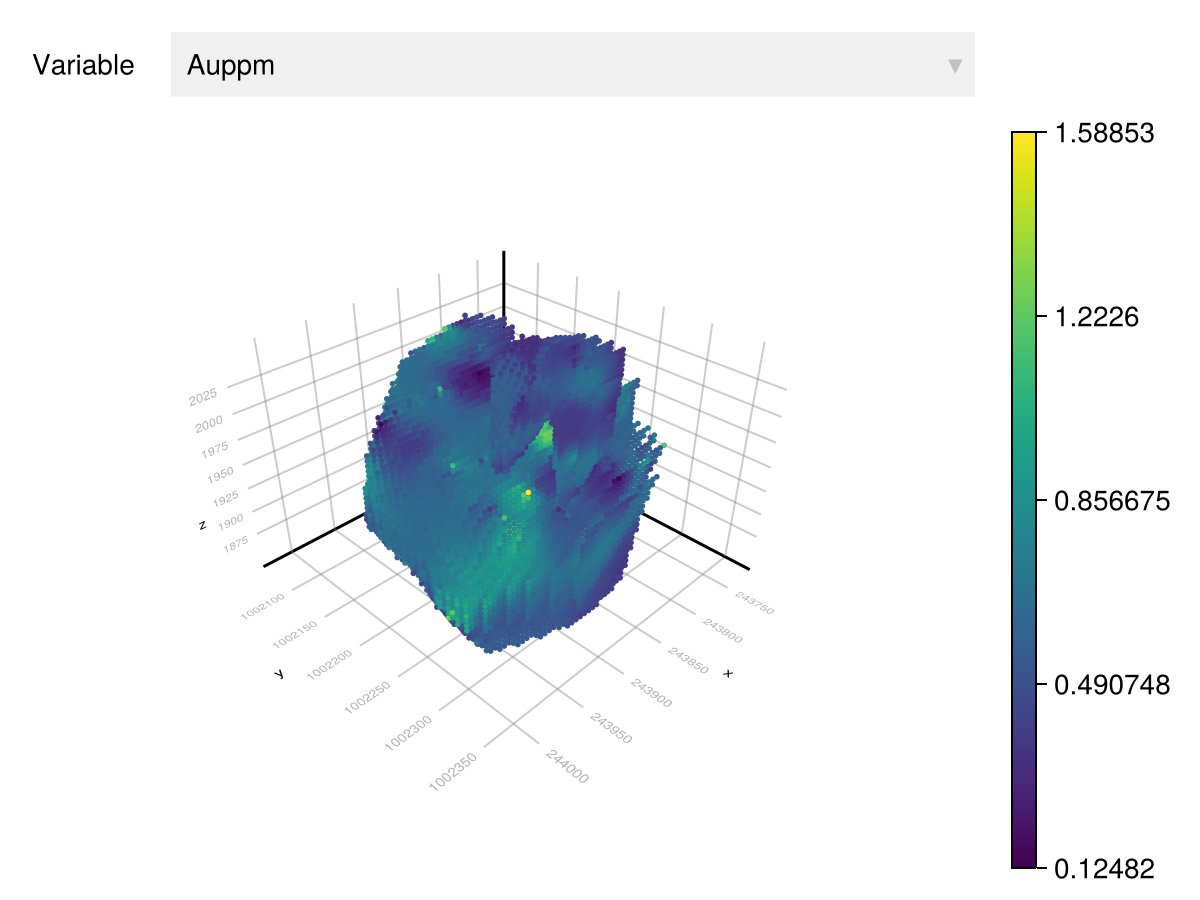

In [34]:
names(gt)
gt |> viewer

In [35]:
clean = Reject("Sper") →
        DropMissing() →
        Rename("Auppm" => "Au", "Agppm" => "Ag",
               "Cuppm" => "Cu", "Asppm" => "As",
               "CODE" => "geo", "OX" => "litho",
               "ISBD" => "ρ")

SequentialTransform
├─ Reject([:Sper])
├─ DropMissing(all)
└─ Rename([:Auppm, :Agppm, :Cuppm, :Asppm, :CODE, :OX, :ISBD], [:Au, :Ag, :Cu, :As, :geo, :litho, :ρ])

In [36]:
gt = gt |> clean

Au,Ag,Cu,As,geo,litho,ρ,geometry
Continuous,Continuous,Continuous,Continuous,Categorical,Categorical,Continuous,Point3
[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],
0.407,2.335,1311.0,27.0,C1,TR1,2.42,"(243940.0, 1.00223e6, 1855.0)"
0.407,2.335,1311.0,27.0,C1,TR1,1.98,"(243945.0, 1.00223e6, 1855.0)"
0.407,2.335,1311.0,27.0,C1,TR1,2.068,"(243950.0, 1.00226e6, 1855.0)"
0.385,2.1,572.0,0.0,C1,TR1,2.222,"(243965.0, 1.00226e6, 1855.0)"
0.385,2.1,572.0,0.0,C1,TR1,2.156,"(243970.0, 1.00226e6, 1855.0)"
0.385,2.1,572.0,0.0,C1,OX1,2.08,"(243960.0, 1.00227e6, 1855.0)"
0.385,2.1,572.0,0.0,C1,OX1,2.06,"(243965.0, 1.00227e6, 1855.0)"
0.385,2.1,572.0,0.0,C1,OX1,1.9,"(243970.0, 1.00227e6, 1855.0)"


In [37]:
groups = @groupby(gt, "geo")
groups[2]

Au,Ag,Cu,As,geo,litho,ρ,geometry
Continuous,Continuous,Continuous,Continuous,Categorical,Categorical,Continuous,Point3
[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],
0.493,8.792,778.45,55.09,C2,OX1,1.96,"(243795.0, 1.00214e6, 1875.0)"
0.55393,7.882,884.2,36.21,C2,OX1,1.88,"(243800.0, 1.00214e6, 1875.0)"
0.587,10.4,915.0,64.0,C2,OX1,2.08,"(243785.0, 1.00214e6, 1880.0)"
0.6143,4.599,973.87,28.78,C2,OX1,2.02,"(243790.0, 1.00214e6, 1880.0)"
0.46839,6.408,889.0,25.36,C2,OX1,2.2,"(243795.0, 1.00214e6, 1880.0)"
0.46084,7.831,900.26,27.95,C2,OX1,2.08,"(243800.0, 1.00214e6, 1880.0)"
0.41787,7.465,908.21,25.13,C2,OX1,1.96,"(243805.0, 1.00214e6, 1880.0)"
0.44078,7.326,938.97,26.07,C2,OX1,2.1,"(243810.0, 1.00214e6, 1880.0)"


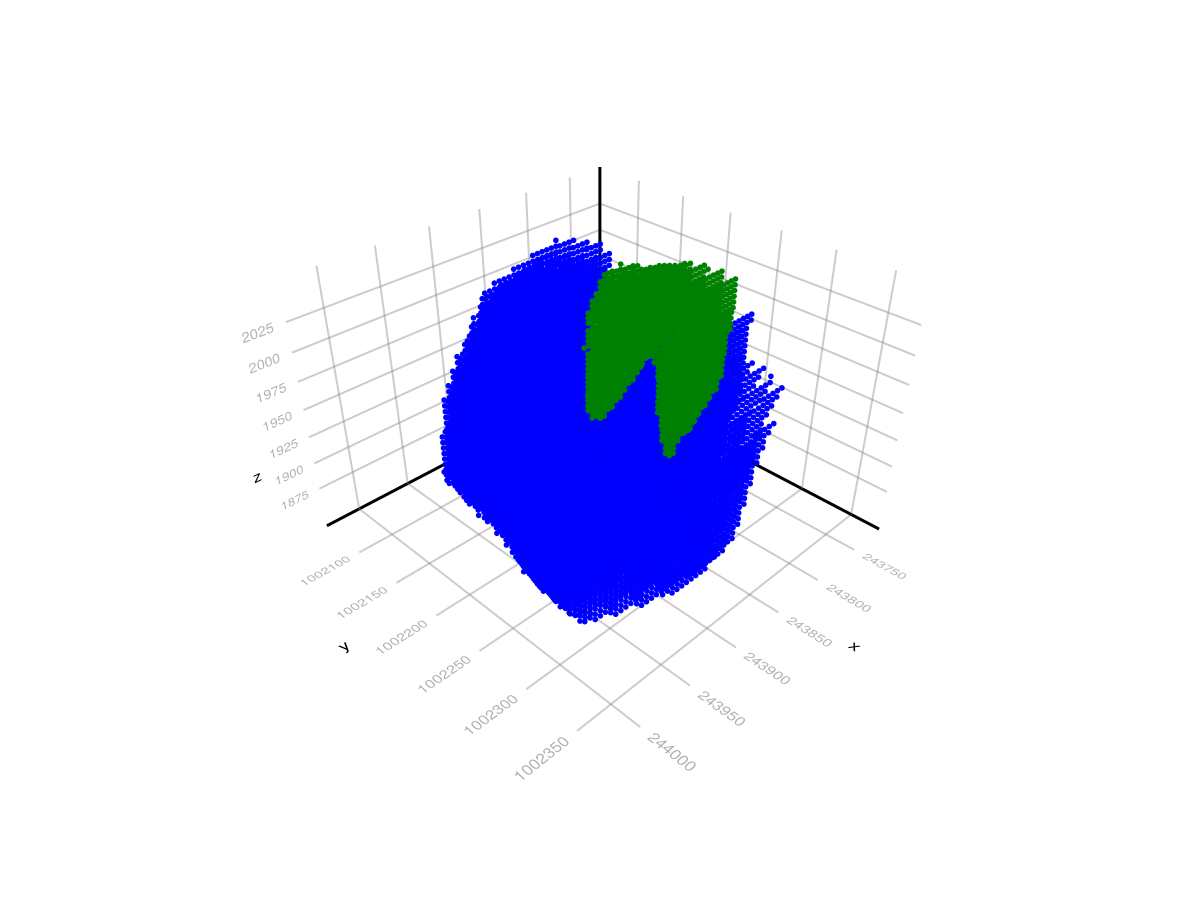

In [38]:
viz(groups[1].geometry, color=:blue)
viz!(groups[2].geometry, color=:green)
Mke.current_figure()

In [39]:
box(point) = Box(point - Vec(2.5, 2.5, 2.5), point + Vec(2.5, 2.5, 2.5))

box (generic function with 1 method)

In [40]:
gt.geometry=box.(gt.geometry)

19548-element Vector{Box{3, Float64}}:
 Box(min: (2.43938e5, 1.00223e6, 1852.5), max: (2.43942e5, 1.00223e6, 1857.5))
 Box(min: (2.43942e5, 1.00223e6, 1852.5), max: (2.43948e5, 1.00223e6, 1857.5))
 Box(min: (2.43948e5, 1.00226e6, 1852.5), max: (2.43952e5, 1.00226e6, 1857.5))
 Box(min: (2.43962e5, 1.00226e6, 1852.5), max: (2.43968e5, 1.00226e6, 1857.5))
 Box(min: (2.43968e5, 1.00226e6, 1852.5), max: (2.43972e5, 1.00226e6, 1857.5))
 Box(min: (2.43958e5, 1.00227e6, 1852.5), max: (2.43962e5, 1.00227e6, 1857.5))
 Box(min: (2.43962e5, 1.00227e6, 1852.5), max: (2.43968e5, 1.00227e6, 1857.5))
 Box(min: (2.43968e5, 1.00227e6, 1852.5), max: (2.43972e5, 1.00227e6, 1857.5))
 Box(min: (2.43928e5, 1.00222e6, 1857.5), max: (2.43932e5, 1.00222e6, 1862.5))
 Box(min: (2.43932e5, 1.00222e6, 1857.5), max: (2.43938e5, 1.00222e6, 1862.5))
 ⋮
 Box(min: (2.43752e5, 1.00221e6, 2027.5), max: (2.43758e5, 1.00221e6, 2032.5))
 Box(min: (2.43758e5, 1.00221e6, 2027.5), max: (2.43762e5, 1.00221e6, 2032.5))
 Box(min: 

In [41]:
mass = volume.(gt.geometry)

gt |> Map([1,7,2] => ((Au, ρ, geometry) ->  Au * ρ * mass)  => "mass") 

Au,Ag,Cu,As,geo,litho,ρ,mass,geometry
Continuous,Continuous,Continuous,Continuous,Categorical,Categorical,Continuous,Unknown,Box
[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],
0.407,2.335,1311.0,27.0,C1,TR1,2.42,"[123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117 … 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117, 123.117]","Box(min: (2.43938e5, 1.00223e6, 1852.5), max: (2.43942e5, 1.00223e6, 1857.5))"
0.407,2.335,1311.0,27.0,C1,TR1,1.98,"[100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732 … 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732, 100.732]","Box(min: (2.43942e5, 1.00223e6, 1852.5), max: (2.43948e5, 1.00223e6, 1857.5))"
0.407,2.335,1311.0,27.0,C1,TR1,2.068,"[105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209 … 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209, 105.209]","Box(min: (2.43948e5, 1.00226e6, 1852.5), max: (2.43952e5, 1.00226e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,TR1,2.222,"[106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934 … 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934, 106.934]","Box(min: (2.43962e5, 1.00226e6, 1852.5), max: (2.43968e5, 1.00226e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,TR1,2.156,"[103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758 … 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758, 103.758]","Box(min: (2.43968e5, 1.00226e6, 1852.5), max: (2.43972e5, 1.00226e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,OX1,2.08,"[100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1 … 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1]","Box(min: (2.43958e5, 1.00227e6, 1852.5), max: (2.43962e5, 1.00227e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,OX1,2.06,"[99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375 … 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375, 99.1375]","Box(min: (2.43962e5, 1.00227e6, 1852.5), max: (2.43968e5, 1.00227e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,OX1,1.9,"[91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375 … 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375, 91.4375]","Box(min: (2.43968e5, 1.00227e6, 1852.5), max: (2.43972e5, 1.00227e6, 1857.5))"


In [42]:
@transform(gt, :m = :Au * :ρ * volume(:geometry))

Au,Ag,Cu,As,geo,litho,ρ,m,geometry
Continuous,Continuous,Continuous,Continuous,Categorical,Categorical,Continuous,Continuous,Box
[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],
0.407,2.335,1311.0,27.0,C1,TR1,2.42,123.117,"Box(min: (2.43938e5, 1.00223e6, 1852.5), max: (2.43942e5, 1.00223e6, 1857.5))"
0.407,2.335,1311.0,27.0,C1,TR1,1.98,100.732,"Box(min: (2.43942e5, 1.00223e6, 1852.5), max: (2.43948e5, 1.00223e6, 1857.5))"
0.407,2.335,1311.0,27.0,C1,TR1,2.068,105.209,"Box(min: (2.43948e5, 1.00226e6, 1852.5), max: (2.43952e5, 1.00226e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,TR1,2.222,106.934,"Box(min: (2.43962e5, 1.00226e6, 1852.5), max: (2.43968e5, 1.00226e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,TR1,2.156,103.758,"Box(min: (2.43968e5, 1.00226e6, 1852.5), max: (2.43972e5, 1.00226e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,OX1,2.08,100.1,"Box(min: (2.43958e5, 1.00227e6, 1852.5), max: (2.43962e5, 1.00227e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,OX1,2.06,99.1375,"Box(min: (2.43962e5, 1.00227e6, 1852.5), max: (2.43968e5, 1.00227e6, 1857.5))"
0.385,2.1,572.0,0.0,C1,OX1,1.9,91.4375,"Box(min: (2.43968e5, 1.00227e6, 1852.5), max: (2.43972e5, 1.00227e6, 1857.5))"


In [43]:
groups = @groupby(gt, "geo")
@combine(groups, :μ = mean(:Au), :σ = std(:Au), :geometry = first(:geometry))

geo,μ,σ,geometry
Categorical,Continuous,Continuous,Box
[NoUnits],[NoUnits],[NoUnits],
C1,0.581937,0.136264,"Box(min: (2.43938e5, 1.00223e6, 1852.5), max: (2.43942e5, 1.00223e6, 1857.5))"
C2,0.484622,0.095799,"Box(min: (2.43792e5, 1.00214e6, 1872.5), max: (2.43798e5, 1.00214e6, 1877.5))"


In [44]:
groups = @groupby(gt, :geo)

mass = @transform(groups, :m = :Au * :ρ * volume(:geometry))

answer = @combine(mass, :m = sum(:m))

geo,m,geometry
Categorical,Continuous,Multi
[NoUnits],[NoUnits],
C1,2.53302e6,Multi(17153×Box)
C2,3.29241e5,Multi(2395×Box)


In [45]:
@chain gt begin
	@groupby(:geo)
	@transform(:m = :Au * :ρ * volume(:geometry))
	@combine(:m = sum(:m))
 end

geo,m,geometry
Categorical,Continuous,Multi
[NoUnits],[NoUnits],
C1,2.53302e6,Multi(17153×Box)
C2,3.29241e5,Multi(2395×Box)


# GEOSPATIAL DATA

In [46]:
using GeoIO

countries = GeoIO.load(Paths * "data/countries.geojson", numbertype = Float64)

COUNTRY,REGION,geometry
Categorical,Categorical,MultiPolygon
[NoUnits],[NoUnits],
Fiji,Melanesia,Multi(3×PolyArea)
Tanzania,Eastern Africa,Multi(1×PolyArea)
W. Sahara,Northern Africa,Multi(1×PolyArea)
Canada,Northern America,Multi(30×PolyArea)
United States of America,Northern America,Multi(10×PolyArea)
Kazakhstan,Central Asia,Multi(1×PolyArea)
Uzbekistan,Central Asia,Multi(1×PolyArea)
Papua New Guinea,Melanesia,Multi(4×PolyArea)


In [47]:
table = (
  NAME=["John", "Mary", "Paul", "Anne", "Kate"],
  AGE=[34.0, 12.0, 23.0, 39.0, 28.0]u"yr",
  HEIGHT=[1.78, 1.56, 1.70, 1.80, 1.72]u"m",
  LATITUDE=[-22.96710361241228, 37.42773662442142, -27.486220858775997, 39.90358408375064, -3.847311538763359],
  LONGITUDE=[-43.17891118844475, -122.17007072663823, 153.04380578036657, 116.40764745941036, -32.411372812211226]
)

people = georef(table, (:LONGITUDE, :LATITUDE))

NAME,AGE,HEIGHT,geometry
Categorical,Continuous,Continuous,Point2
[NoUnits],[yr],[m],
John,34.0 yr,1.78 m,"(-43.1789, -22.9671)"
Mary,12.0 yr,1.56 m,"(-122.17, 37.4277)"
Paul,23.0 yr,1.7 m,"(153.044, -27.4862)"
Anne,39.0 yr,1.8 m,"(116.408, 39.9036)"
Kate,28.0 yr,1.72 m,"(-32.4114, -3.84731)"


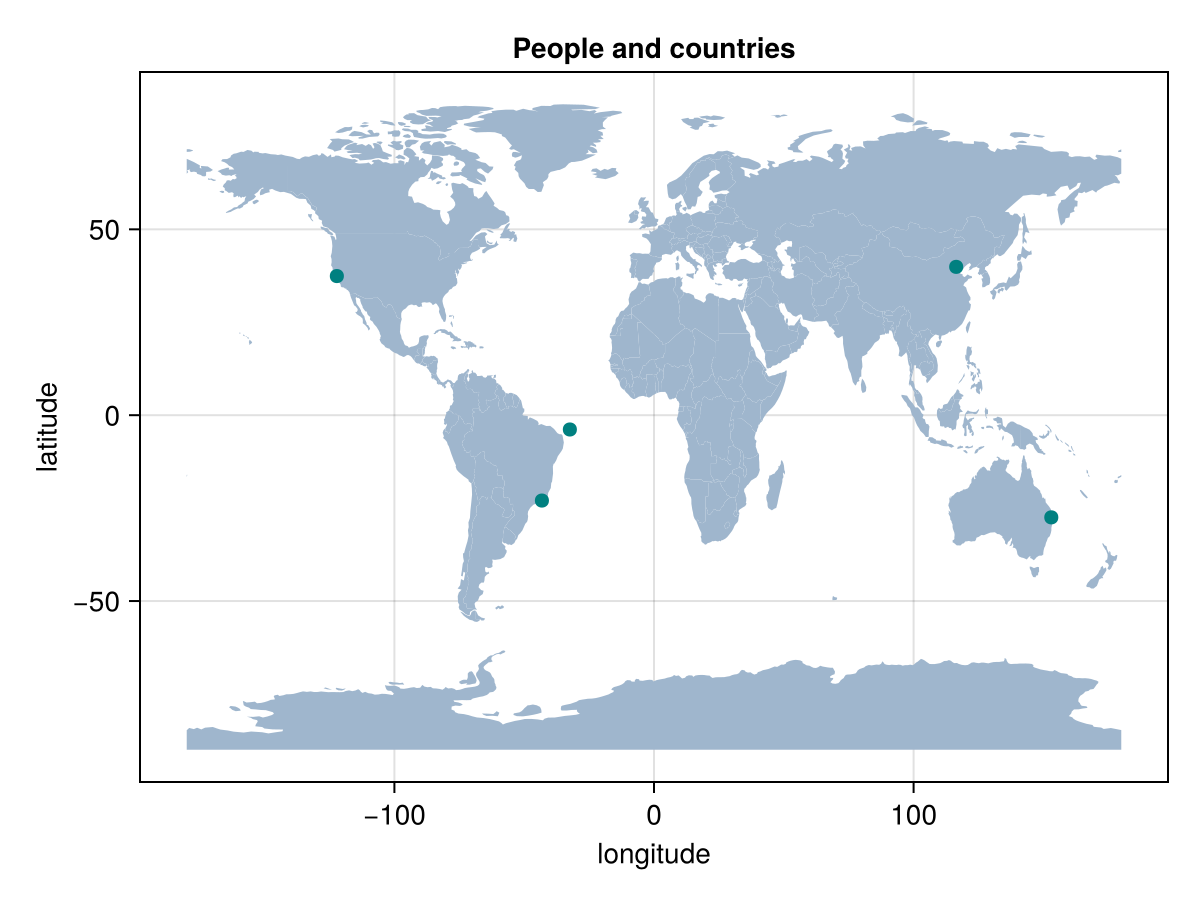

In [48]:
fig = Mke.Figure()
ax = Mke.Axis(fig[1,1], title = "People and countries",
              xlabel = "longitude", ylabel = "latitude")
viz!(countries.geometry)
viz!(people.geometry, color = "teal", pointsize = 10)
fig

In [49]:
geojoin(people, countries, pred = ∈)

NAME,AGE,HEIGHT,COUNTRY,REGION,geometry
Categorical,Continuous,Continuous,Categorical,Categorical,Point2
[NoUnits],[yr],[m],[NoUnits],[NoUnits],
John,34.0 yr,1.78 m,Brazil,South America,"(-43.1789, -22.9671)"
Mary,12.0 yr,1.56 m,United States of America,Northern America,"(-122.17, 37.4277)"
Paul,23.0 yr,1.7 m,Australia,Australia and New Zealand,"(153.044, -27.4862)"
Anne,39.0 yr,1.8 m,China,Eastern Asia,"(116.408, 39.9036)"
Kate,28.0 yr,1.72 m,missing,missing,"(-32.4114, -3.84731)"


In [50]:
Pt = geojoin(people, countries)

NAME,AGE,HEIGHT,COUNTRY,REGION,geometry
Categorical,Continuous,Continuous,Categorical,Categorical,Point2
[NoUnits],[yr],[m],[NoUnits],[NoUnits],
John,34.0 yr,1.78 m,Brazil,South America,"(-43.1789, -22.9671)"
Mary,12.0 yr,1.56 m,United States of America,Northern America,"(-122.17, 37.4277)"
Paul,23.0 yr,1.7 m,Australia,Australia and New Zealand,"(153.044, -27.4862)"
Anne,39.0 yr,1.8 m,China,Eastern Asia,"(116.408, 39.9036)"
Kate,28.0 yr,1.72 m,missing,missing,"(-32.4114, -3.84731)"


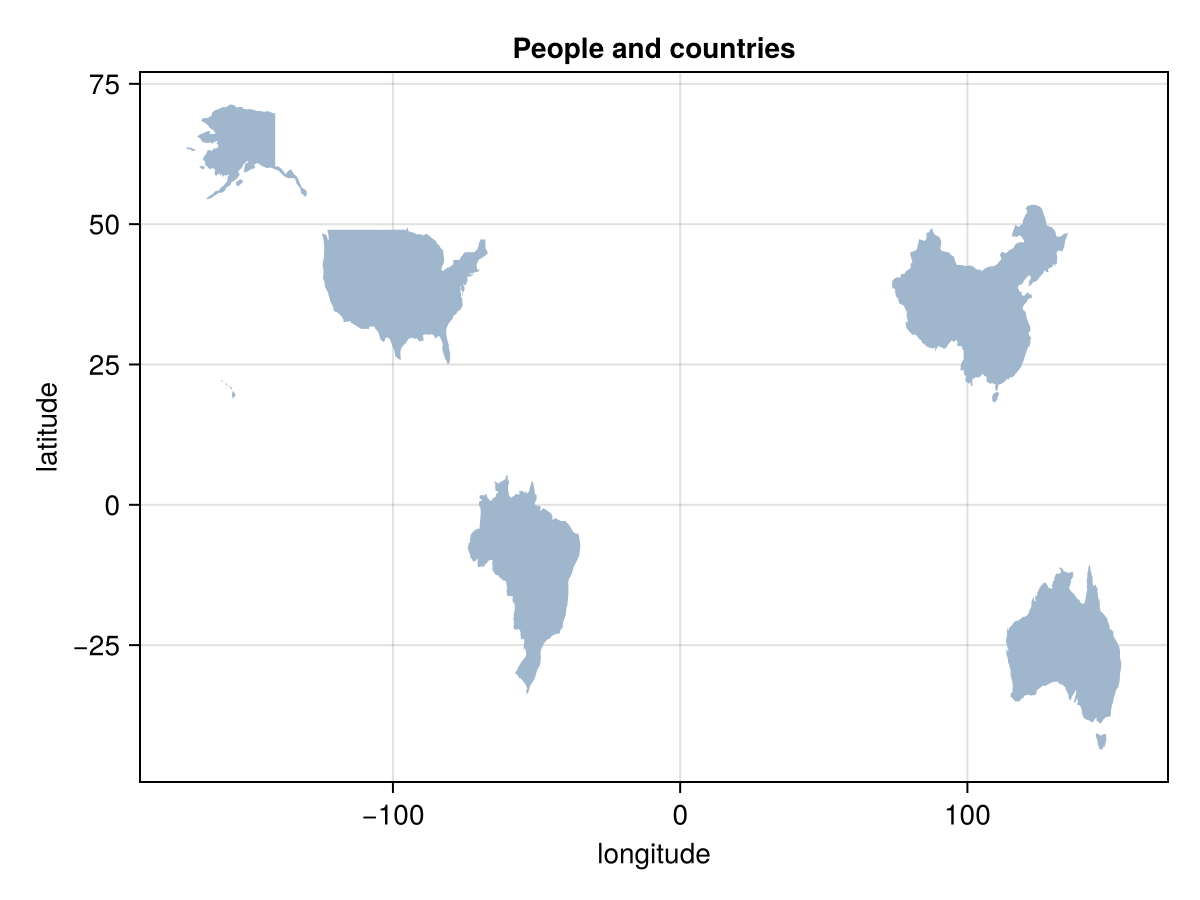

In [51]:
fig = Mke.Figure()
ax = Mke.Axis(fig[1,1], title = "People and countries",
              xlabel = "longitude", ylabel = "latitude")
Pt = geojoin( countries, people, kind = :inner)
viz!(Pt.geometry, pointsize = 10)
fig

In [52]:
gt1 = georef((a=[1,2,3], b=[4,5,6]))
gt2 = georef((b=[4,5,6], c=[7,8,9]))

vcat(gt1, gt2, kind = :intersect)

b,geometry
Categorical,Segment
[NoUnits],
4,"Segment((0.0,), (1.0,))"
5,"Segment((1.0,), (2.0,))"
6,"Segment((2.0,), (3.0,))"
4,"Segment((0.0,), (1.0,))"
5,"Segment((1.0,), (2.0,))"
6,"Segment((2.0,), (3.0,))"


In [53]:
[gt1 
gt2]

a,b,c,geometry
Categorical,Categorical,Categorical,Segment
[NoUnits],[NoUnits],[NoUnits],
1,4,missing,"Segment((0.0,), (1.0,))"
2,5,missing,"Segment((1.0,), (2.0,))"
3,6,missing,"Segment((2.0,), (3.0,))"
missing,4,7,"Segment((0.0,), (1.0,))"
missing,5,8,"Segment((1.0,), (2.0,))"
missing,6,9,"Segment((2.0,), (3.0,))"


In [54]:
[gt1 gt2]

a,b,b_,c,geometry
Categorical,Categorical,Categorical,Categorical,Segment
[NoUnits],[NoUnits],[NoUnits],[NoUnits],
1,4,4,7,"Segment((0.0,), (1.0,))"
2,5,5,8,"Segment((1.0,), (2.0,))"
3,6,6,9,"Segment((2.0,), (3.0,))"


In [55]:
hcat(gt1, gt2)

a,b,b_,c,geometry
Categorical,Categorical,Categorical,Categorical,Segment
[NoUnits],[NoUnits],[NoUnits],[NoUnits],
1,4,4,7,"Segment((0.0,), (1.0,))"
2,5,5,8,"Segment((1.0,), (2.0,))"
3,6,6,9,"Segment((2.0,), (3.0,))"


In [56]:
gt1 = georef((a=[1,2,3], b=[4,5,6]))
gt2 = georef((b=[4,5,6], c=[7,8,9]))

pred(g1, g2) = evaluate(Euclidean(), centroid(g1), centroid(g2)) ≤ 1u"m"`

Base.Meta.ParseError: ParseError:
# Error @ d:\MAIN\MODELS\AquaPore_Toolkit\src\Temporary\Geospatial\Geospatial2.ipynb:4:74

pred(g1, g2) = evaluate(Euclidean(), centroid(g1), centroid(g2)) ≤ 1u"m"`
#                                                                        └ ── unterminated string literal

In [57]:
table = (
  NAME=["John", "Mary", "Paul", "Anne", "Kate"],
  AGE=[34.0, 12.0, 23.0, 39.0, 28.0]u"yr",
  HEIGHT=[1.78, 1.56, 1.70, 1.80, 1.72]u"m",
  LATITUDE=[-22.96710361241228, 37.42773662442142, -27.486220858775997, 39.90358408375064, -9.66628224039543],
  LONGITUDE=[-43.17891118844475, -122.17007072663823, 153.04380578036657, 116.40764745941036, -35.71261407423411]
)

people = georef(table, (:LONGITUDE, :LATITUDE))

NAME,AGE,HEIGHT,geometry
Categorical,Continuous,Continuous,Point2
[NoUnits],[yr],[m],
John,34.0 yr,1.78 m,"(-43.1789, -22.9671)"
Mary,12.0 yr,1.56 m,"(-122.17, 37.4277)"
Paul,23.0 yr,1.7 m,"(153.044, -27.4862)"
Anne,39.0 yr,1.8 m,"(116.408, 39.9036)"
Kate,28.0 yr,1.72 m,"(-35.7126, -9.66628)"


In [58]:
geojoin(people, countries)

NAME,AGE,HEIGHT,COUNTRY,REGION,geometry
Categorical,Continuous,Continuous,Categorical,Categorical,Point2
[NoUnits],[yr],[m],[NoUnits],[NoUnits],
John,34.0 yr,1.78 m,Brazil,South America,"(-43.1789, -22.9671)"
Mary,12.0 yr,1.56 m,United States of America,Northern America,"(-122.17, 37.4277)"
Paul,23.0 yr,1.7 m,Australia,Australia and New Zealand,"(153.044, -27.4862)"
Anne,39.0 yr,1.8 m,China,Eastern Asia,"(116.408, 39.9036)"
Kate,28.0 yr,1.72 m,Brazil,South America,"(-35.7126, -9.66628)"


In [59]:
geojoin(countries, people, kind = :inner)

COUNTRY,REGION,NAME,AGE,HEIGHT,geometry
Categorical,Categorical,Categorical,Continuous,Continuous,MultiPolygon
[NoUnits],[NoUnits],[NoUnits],[yr],[m],
United States of America,Northern America,Mary,12.0 yr,1.56 m,Multi(10×PolyArea)
Brazil,South America,John,31.0 yr,1.75 m,Multi(1×PolyArea)
Australia,Australia and New Zealand,Paul,23.0 yr,1.7 m,Multi(2×PolyArea)
China,Eastern Asia,Anne,39.0 yr,1.8 m,Multi(2×PolyArea)


In [60]:
geojoin(countries, people, "AGE" => maximum, "HEIGHT" => mean, kind = :inner)

COUNTRY,REGION,NAME,AGE,HEIGHT,geometry
Categorical,Categorical,Categorical,Continuous,Continuous,MultiPolygon
[NoUnits],[NoUnits],[NoUnits],[yr],[m],
United States of America,Northern America,Mary,12.0 yr,1.56 m,Multi(10×PolyArea)
Brazil,South America,John,34.0 yr,1.75 m,Multi(1×PolyArea)
Australia,Australia and New Zealand,Paul,23.0 yr,1.7 m,Multi(2×PolyArea)
China,Eastern Asia,Anne,39.0 yr,1.8 m,Multi(2×PolyArea)


# Geospatial correlation

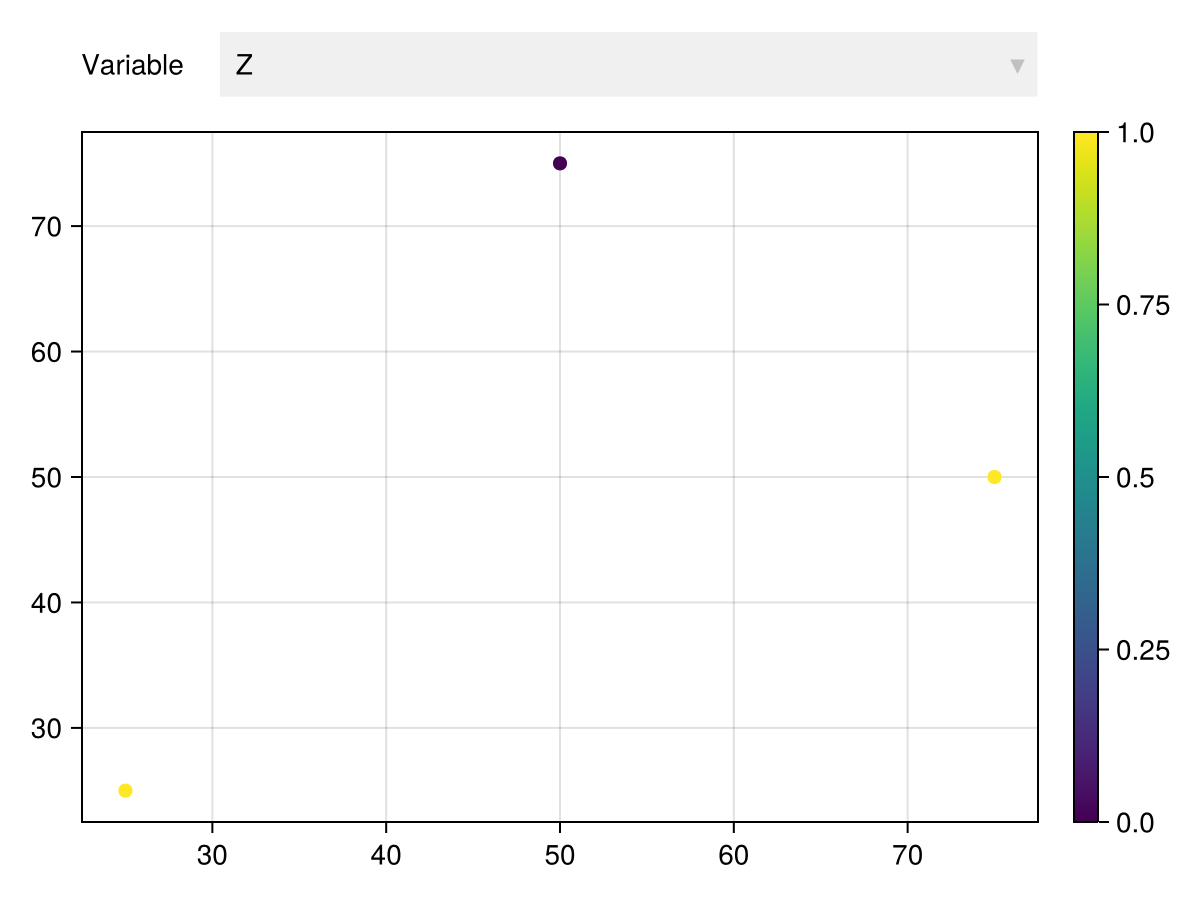

In [85]:
data = georef((Z=[1.0, 0.0, 1.0],), [(25, 25), (50, 75), (75, 50)])

grid = CartesianGrid(100, 100)
viewer(data, pointsize = 10)

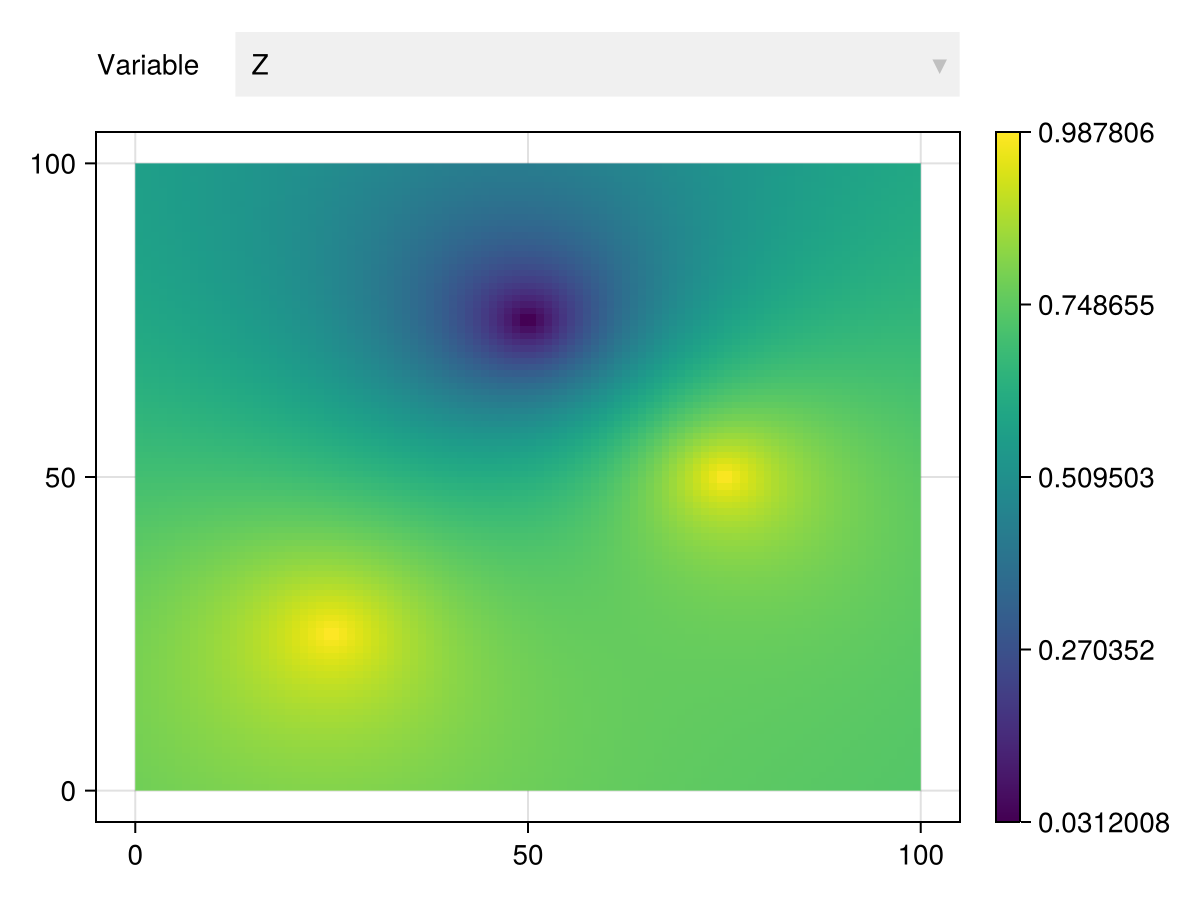

In [86]:
interp = data |> Interpolate(grid, IDW()) |> viewer

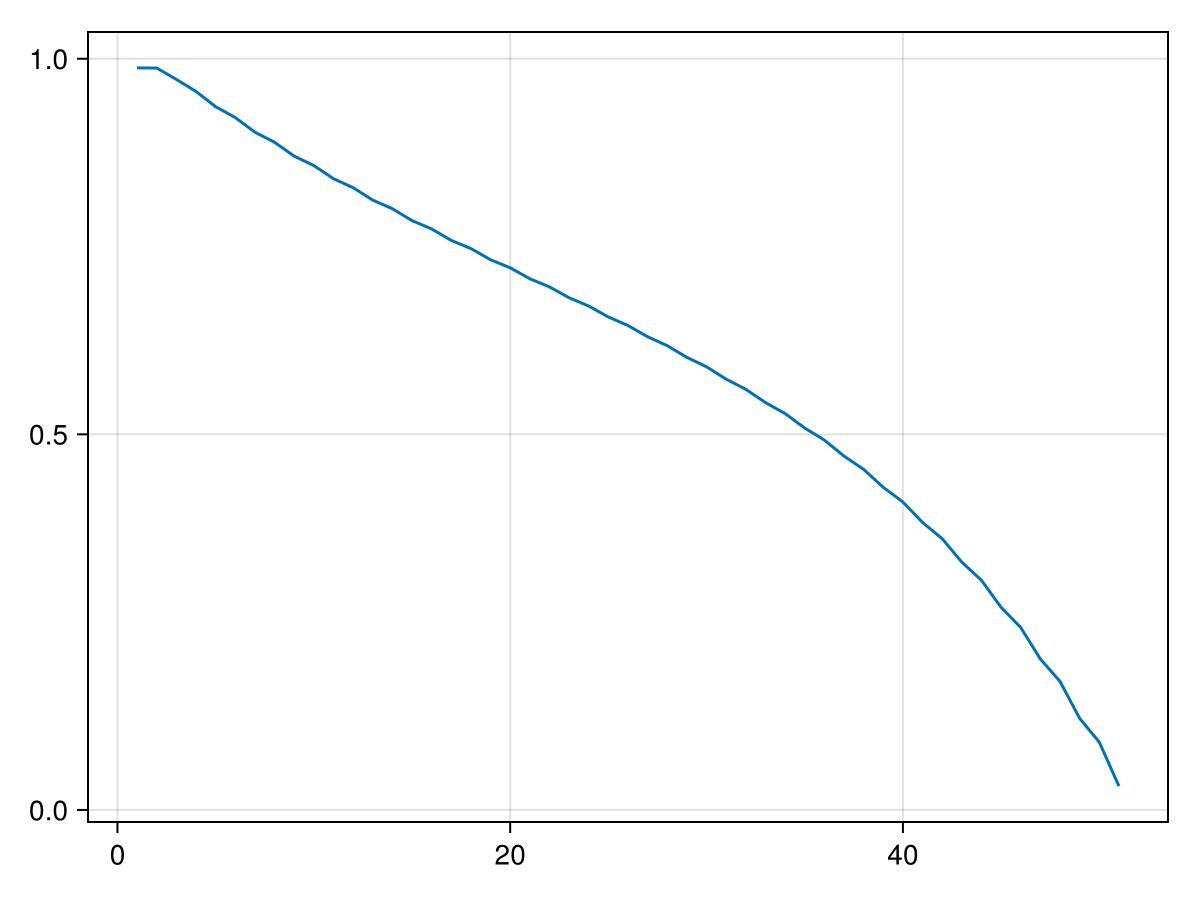

In [95]:
data = georef((z=[1.0, 0.0, 1.0],), [(25, 25), (50, 75), (75, 50)])
grid = CartesianGrid(100, 100)
interp = data |> Interpolate(grid, IDW())
seg = Segment((25, 25), (50, 75))
z = interp[seg, "z"]
Mke.lines(z)


Geospatial interpolation can be achieved with the Interpolate and InterpolateNeighbors transforms, and geostatistical models such as IDW and Kriging.
Models such as Kriging exploit geospatial correlation to improve interpolation results. We can extract this information from samples using a two-step procedure:
Estimate the EmpiricalVariogram from the available samples
Perform fit of theoretical model with result from previous step
Interpolate and InterpolateNeighbors are examples of geostatistical transforms. They can be easily inserted in more advanced pipelines as discussed in Part II.
In the next chapters, we will use the framework that we learned with real data to illustrate how advanced geospatial data science can be done with just a few lines of code. Once a solution is written in terms of the high-level tools covered in previous chapters, it is trivial to improve computational performance in pure Julia.